# **1. Perkenalan Dataset**


## Dataset: Student Mental Health Analysis

Dataset ini diperoleh dari platform [Kaggle](https://www.kaggle.com/datasets/utkarshsharma11r/student-mental-health-analysis) yang berisi informasi kondisi kesehatan mental siswa selama penerapan pembelajaran online seperti Nama, Jenis Kelamin, Usia, Tingkat Pendidikan, Waktu Layar, Durasi Tidur, Aktifitas Fisik, Tingkat Stress, Kekhawatiran Sebelum Ujian, dan Perubahan Performa Akademik.

## Tujuan
Membangun model machine learning yang dapat memprediksi tingkat kesehatan mental mahasiswa berdasarkan karakteristik siswa.

## Deskripsi Fitur
| Fitur                        | Deskripsi         |
| ---------------------------- |-------------------|
|`Name`| Nama depan siswa (tidak esensial untuk analisis, dapat dianonimkan).|
|`Gender`| Jenis kelamin responden (Laki-laki/ Perempuan).|
|`Age`| Usia dalam tahun.|
|`Education Level`| Tingkat pendidikan akademik (contoh: Kelas 8, BTech, MSc).|
|`Screen Time` (hrs/day)| Rata-rata waktu penggunaan layar per hari selama pembelajaran daring.|
|`Sleep Duration` (hrs)| Rata-rata durasi tidur harian.|
|`Physical Activity` (hrs/week)| Waktu yang dihabiskan untuk berolahraga setiap minggu.|
|`Stress Level`| Tingkat stres yang dilaporkan (Rendah, Sedang, Tinggi).|
|`Anxious Before Exams`| Apakah siswa merasa cemas sebelum ujian (Ya/Tidak).|
|`Academic Performance Change`| Penilaian pribadi terhadap perubahan kinerja akademik (misalnya: Meningkat, Menurun, Tetap).|


## Tipe Masalah
Klasifikasi biner: target hanya memiliki dua kemungkinan nilai yaitu:

- 0 = Sehat
- 1 = Tidak Sehat

## Sumber Dataset
Dataset dapat diakses melalui tautan berikut:
https://www.kaggle.com/datasets/utkarshsharma11r/student-mental-health-analysis

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
# Manipulasi Data
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Pra-pemrosesan
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Model Machine Learning
from sklearn.ensemble import RandomForestClassifier

# Model & Evaluasi
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score


# Handling imbalance
from imblearn.over_sampling import SMOTE
from collections import Counter

# Utilities
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("utkarshsharma11r/student-mental-health-analysis")

print("Path to dataset files:", path)

100%|██████████| 10.5k/10.5k [00:00<00:00, 3.78MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/utkarshsharma11r/student-mental-health-analysis/versions/1


In [ ]:
import os

data_path = "/root/.cache/kagglehub/datasets/utkarshsharma11r/student-mental-health-analysis/versions/1"
os.listdir(data_path)

['Student Mental Health Analysis During Online Learning.csv']

In [ ]:
df = pd.read_csv(f"{data_path}/Student Mental Health Analysis During Online Learning.csv")

In [ ]:
# Tampilkan beberapa baris pertama
df.head()

,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,Aarav,Male,15,Class 8,7.1,8.9,9.3,Medium,No,Same
1,Meera,Female,25,MSc,3.3,5.0,0.2,Medium,No,Same
2,Ishaan,Male,20,BTech,9.5,5.4,6.2,Medium,No,Same
3,Aditya,Male,20,BA,10.8,5.6,5.5,High,Yes,Same
4,Anika,Female,17,Class 11,2.8,5.4,3.1,Medium,Yes,Same


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


Pada tahap ini, dilakukan pengecekan struktur dataset menggunakan fungsi `df.info()`.
Tujuannya adalah untuk memahami jumlah entri, tipe data setiap kolom, dan apakah terdapat missing value.

Hasil pengecekan Dataset:

- Dataset memiliki 1000 entri dan 10 kolom.
- Tidak ditemukan missing value dan duplikasi data pada setiap kolom (semua kolom memiliki 1000 non-null).
- Tipe data setiap kolom:
  - Name, Gender, Education Level, Stress Level, Anxious Before Exam, Academic Performance Change ➔ object
  - Screen Time, Sleep Duration, Physical Activity ➔ float64 (kategori/teks)
  - Age ➔ int64


In [ ]:
# Dimensi data
print("Ukuran dataset:", df.shape)

# Informasi kolom dan tipe data
df.info()

Ukuran dataset: (1000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1000 non-null   object 
 1   Gender                        1000 non-null   object 
 2   Age                           1000 non-null   int64  
 3   Education Level               1000 non-null   object 
 4   Screen Time (hrs/day)         1000 non-null   float64
 5   Sleep Duration (hrs)          1000 non-null   float64
 6   Physical Activity (hrs/week)  1000 non-null   float64
 7   Stress Level                  1000 non-null   object 
 8   Anxious Before Exams          1000 non-null   object 
 9   Academic Performance Change   1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


In [ ]:
# Cek nilai yang hilang
df.isnull().sum()

,0
Name,0
Gender,0
Age,0
Education Level,0
Screen Time (hrs/day),0
Sleep Duration (hrs),0
Physical Activity (hrs/week),0
Stress Level,0
Anxious Before Exams,0
Academic Performance Change,0


In [ ]:
# Cek Nilai yang terduplikasi
df.duplicated().sum()

np.int64(0)

Karena kolom `Name` merupakan data yang tidak menyerupai suatu pola, maka kolom tersebut akan dihapus.

In [ ]:
df.drop('Name', axis=1, inplace=True)

### Distribusi Fitur Kategorikal

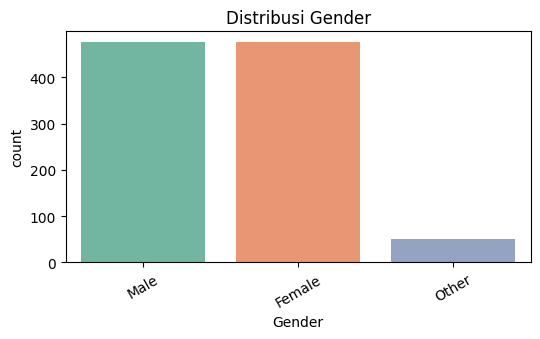

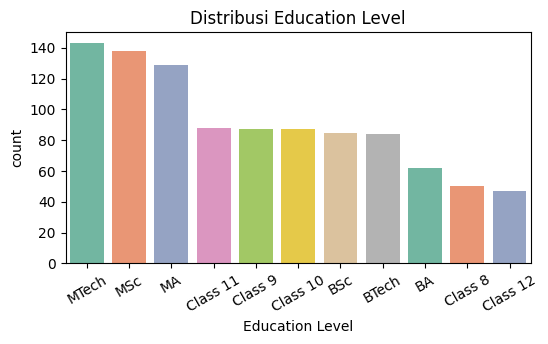

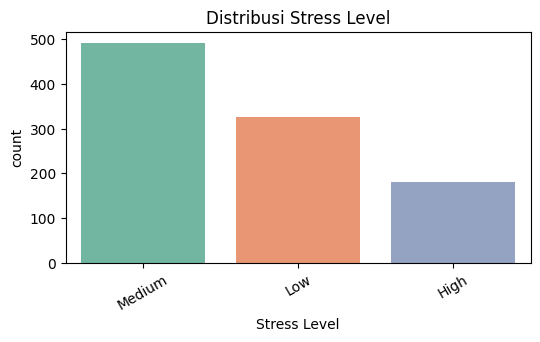

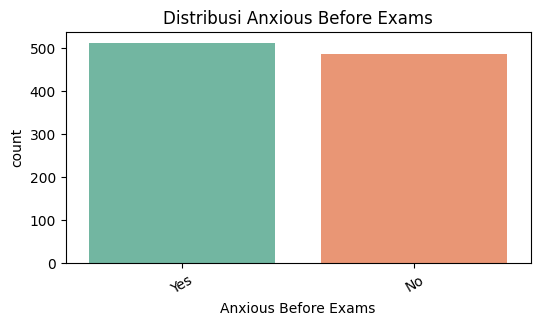

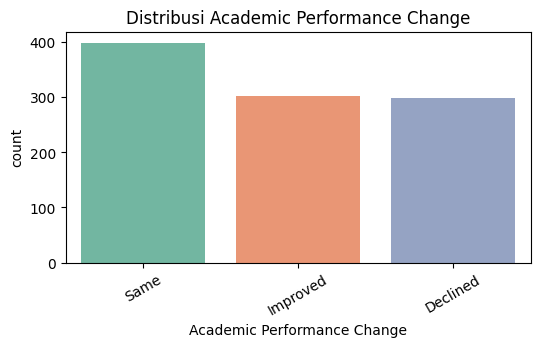

In [ ]:
categorical_cols = ['Gender', 'Education Level', 'Stress Level', 'Anxious Before Exams', 'Academic Performance Change']

for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=30)
    plt.show()

Pada hasil pengecekan data kategori, ditemukan beberapa insights sebagai berikut:
- Terdapat sedikit ketidaksesuaian data pada fitur `Gender` sehinngga teridentifikasi sebagai other. Padahal `Gender` hanya akan merepresentasikan Laki-laki dan Perempuan.
- Tingkat distribusi pada fitur `Education Level` dan `Stress Level` cukup variatif.
- Fitur `Anxious Before Exams` memiliki distribusi data yang hampir seimbang.
- Fitur `Academic Performance Change` didominasi oleh kategori `Same` namun juga seimbang antara `Improved` dan `Declined`, sehingga persebaran tingkat performa siswa dapat dikatakan cukup bervariasi.

### Boxplot Fitur Numerik

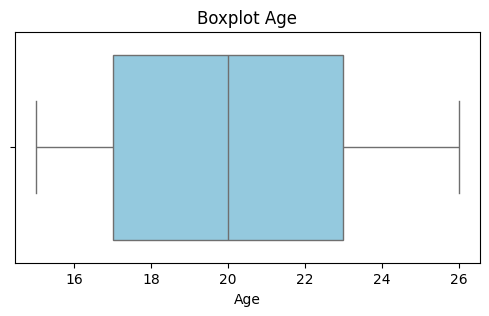

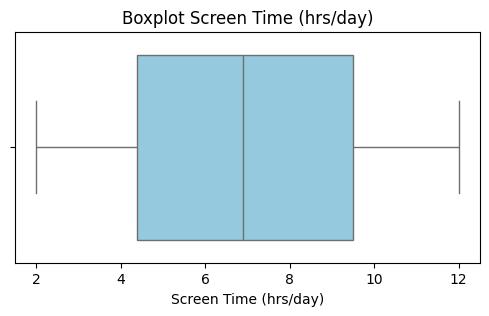

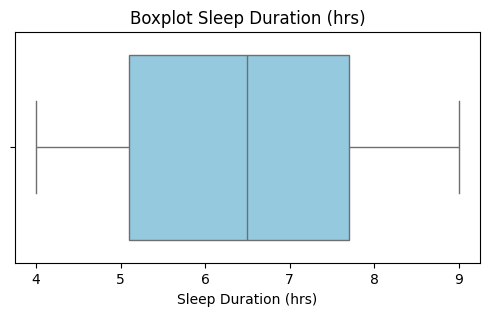

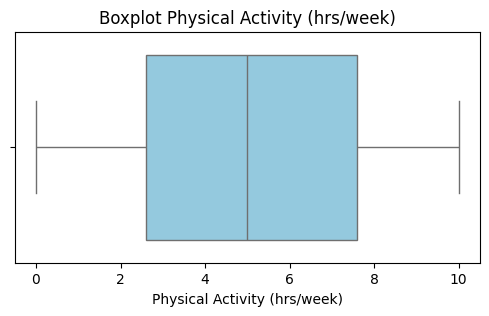

In [ ]:
numerical_cols = ['Age', 'Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)']

for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot {col}')
    plt.show()

Berdasarkan hasil distribusi kolom numerik di atas, fitur-fitur di atas tidak memliki nilai outlier dan berada pada rentang yang wajar. Sehingga siap untuk diolah.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kamu menggunakan data tidak terstruktur.

Pada hasil EDA di atas, bahwa fitur `Gender` memiliki nilai Other yang tidak cocok, maka mari kita cek data tersebut.

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,475
Female,475
Other,50


Karena kategori Other pada fitur `Gender` berjumlah 50 yakni hanya 5% dari data, maka dapat didrop saja demi menghindari overfitting ke kategori minoritas yang tidak representatif.

In [ ]:
df = df[df['Gender'].isin(['Male', 'Female'])]

Selanjutnya, untuk menentukan kondisi kesehatan mental awal, maka akan kondisi akan mengambil nilainya dari fitur `Stress Level`.

In [ ]:
# Membuat kolom target Mental_Health_Status
df['MH_from_stress'] = df['Stress Level'].map({
    'Low': 0,         # Sehat
    'Medium': 1,      # Tidak Sehat
    'High': 1         # Tidak Sehat
})

Setelah mencoba melakukan pemodelan random forest awal secara mandiri, sistem prediksi yang mengacu hanya pada nilai fitur `Stress Level` hanya menghasilkan nilai akurasi sekitar 63%. Sehingga perlu adanya fitur-fitur lain yang juga turut berpengaruh dalam menghasilkan tingkat akurasi yang lebih tinggi.

Saat melakukan random forest awal, saya juga melakukan features importance dan diketahui bahwa terdapat fitur-fitur numerik yang sangat berpengaruh terhadap prediksi kesehatan mental. Berikut hasil feature importance yang saya lakukan secara mandiri sebelumnya.

|   | Feature                        |   Importance |
|---|--------------------------------|--------------|
| 1 | Screen Time (hrs/day)          |     0.214964 |
| 3 | Physical Activity (hrs/week)   |     0.209128 |
| 2 | Sleep Duration (hrs)           |     0.199483 |
| 0 | Age                            |     0.108859 |
| 15| Anxious Before Exams\_Yes       |     0.041061 |
| 4 | Gender\_Male                   |     0.036271 |
| 17| Academic Performance Change\_Same |     0.032572 |
| 16| Academic Performance Change\_Improved |     0.029390 |
| 12| Education Level\_MA            |     0.016618 |
| 13| Education Level\_MSc           |     0.015191 |

**Kode untuk features importance ini saya hapus untuk notebook yang lebih rapi dan mudah dipahami.*

Dari hasil di atas dapat diketahui bahwa terdapat 4 fitur numerik lain yang akan sangat mempengaruhi prediksi model secara signifikan dengan total lebih dari 50% importance level. Fitur tersbut adalah `Screen Time`, `Physical Activity`, `Sleep Duration`, dan `Age`.

Untuk memperbarui penetapan target selain menggunakan `Stress Level`, maka perlu diketahui keterkaitan antara `MH_from_stress` dengan keempat variabel di atas melalui pengecekan statistik deskriptif. Hal ini dilakukan agar dapat diketahui nanti pembuatan nilai ambang batasnya.

In [ ]:
# Statistik deskriptif untuk insight ambang batas
print("Statistik deskriptif 'Screen Time (hrs/day)' berdasarkan MH_from_stress:")
print(df.groupby('MH_from_stress')['Screen Time (hrs/day)'].describe())
print("\n" + "-"*40 + "\n")

print("Statistik deskriptif 'Sleep Duration (hrs)' berdasarkan MH_from_stress:")
print(df.groupby('MH_from_stress')['Sleep Duration (hrs)'].describe())
print("\n" + "-"*40 + "\n")

print("Statistik deskriptif 'Physical Activity (hrs/week)' berdasarkan MH_from_stress:")
print(df.groupby('MH_from_stress')['Physical Activity (hrs/week)'].describe())
print("\n" + "-"*40 + "\n")

Statistik deskriptif 'Screen Time (hrs/day)' berdasarkan MH_from_stress:
                count      mean       std  min  25%  50%    75%   max
MH_from_stress                                                       
0               312.0  6.928205  2.889371  2.0  4.5  7.0  9.325  12.0
1               638.0  6.933386  2.938554  2.0  4.4  7.0  9.600  12.0

----------------------------------------

Statistik deskriptif 'Sleep Duration (hrs)' berdasarkan MH_from_stress:
                count      mean       std  min    25%  50%    75%  max
MH_from_stress                                                        
0               312.0  6.516667  1.483579  4.0  5.175  6.7  7.725  9.0
1               638.0  6.409561  1.468899  4.0  5.100  6.4  7.700  9.0

----------------------------------------

Statistik deskriptif 'Physical Activity (hrs/week)' berdasarkan MH_from_stress:
                count      mean       std  min    25%   50%  75%   max
MH_from_stress                                        

In [ ]:
# Membuat bin umur
bins = [14, 18, 22, 26, 30]
labels = ['15-18', '19-22', '23-26', '27-30']
df['Age_binned'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

In [ ]:
age_dist = df.groupby(['MH_from_stress', 'Age_binned']).size().unstack(fill_value=0)
print(age_dist)

Age_binned      15-18  19-22  23-26  27-30
MH_from_stress                            
0                 113     95    104      0
1                 212    221    205      0


Berdasarkan hasil pengecekan deskriptif dan distribusi di atas, berikut insights yang didapat:

| Fitur                      | Threshold         | Alasan                      |
|----------------------------|-------------------|---------------------------  |
| Screen Time (hrs/day)      | ≤ 9.0             | Karena kuartil ketiga (Q3) untuk kelas 0 adalah 9.325, dan untuk kelas 1 adalah 9.6.                                                 |
| Sleep Duration (hrs)       | ≥ 6.4             | Karena nilai median untuk kedua kelas (0 dan 1) berada dalam rentang 6.4–6.7.                                                         |
| Physical Activity (hrs/week)| ≥ 4.5             | Karena nilai median untuk kedua kelas (0 dan 1) berada dalam rentang 4.55–5.10.                                                        |
| Age                        | 19–26 (dua bin tengah) | Karena distribusi label 1 (kemungkinan mengacu pada status mental health tertentu) paling banyak terdapat pada rentang umur 19–26. |

Berdasarkan insights tersebut, mari kita tentukan Status Mental Health kembali.



In [ ]:
# Membuat kolom Mental_Health_Status akhir berdasarkan 4 indikator
def determine_mental_health(row):
    screen_time_ok = row['Screen Time (hrs/day)'] <= 9.0
    sleep_ok = row['Sleep Duration (hrs)'] >= 6.4
    activity_ok = row['Physical Activity (hrs/week)'] >= 4.5
    age_ok = row['Age_binned'] in ['19-22', '23-26']

    conditions_met = sum([screen_time_ok, sleep_ok, activity_ok, age_ok])
    return 1 if conditions_met >= 3 else 0

df['MH_final'] = df.apply(determine_mental_health, axis=1)

In [ ]:
# Lihat distribusi target hasil akhir
print("\nDistribusi target (MH_final):")
print(df['MH_final'].value_counts())
print(df['MH_final'].value_counts(normalize=True))


Distribusi target (MH_final):
MH_final
0    490
1    460
Name: count, dtype: int64
MH_final
0    0.515789
1    0.484211
Name: proportion, dtype: float64


Dari hasil penentuan kembali status di atas, maka distribusi Mental Health akhir (`MH_final`) sudah lebih seimbang, tidak ada data imbalance yang sangat menonjol.

Agar dapat dicoba pada pemodelan, maka ditentukan lagi Target dan Fiturnya.

In [ ]:
# Target
y = df['MH_final']

# Fitur terpilih (numerik dan kategorikal)
X = df[['Gender', 'Education Level', 'Anxious Before Exams', 'Academic Performance Change',
        'Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)', 'Age_binned']]

Selanjutnya melakukan pemisahan fitur berdasarkan jenisnya. Di sini saya memisahkan fitur berdasarkan 2 jenis, antara lain:
1. `categorical_cols`: Kolom dengan nilai kategori (teks atau label).
2. `numerical_cols`: Kolom dengan nilai numerik yang akan distandarisasi.

Langkah ini penting untuk memudahkan proses encoding dan scaling yang berbeda penanganannya.

In [ ]:
# Kolom kategorikal
categorical_cols = ['Gender', 'Education Level', 'Anxious Before Exams', 'Academic Performance Change', 'Age_binned']

# Kolom numerik
numerical_cols = ['Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)']

Selanjutnya adalah membangun Pipeline untuk pada data Encoded dan Standardized.

Menggunakan ColumnTransformer untuk:
1. OneHotEncoder: Mengubah kolom kategorikal menjadi dummy variables (kolom biner 0/1).
2. StandardScaler: Melakukan standardisasi (mean=0, std=1) terhadap kolom numerik agar skala fitur seragam.

`handle_unknown='ignore'`: Menangani kategori baru yang tidak ditemukan saat training.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Pipeline encoding untuk kolom kategorikal (One-Hot)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Pipeline scaling untuk kolom numerik (Standarisasi)
numerical_transformer = StandardScaler()

# Gabungkan semuanya dalam ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

Fungsi utama dari `ColumnTransformer` dalam kode di atas adalah untuk menerapkan preprocessing yang berbeda ke kolom yang berbeda dalam satu langkah terintegrasi.

Selain itu, berikut adalah keuntungan penggunaan `ColumnTransformer`, antara lain:
1. Praktis & efisien: Tidak perlu melakukan encoding dan scaling secara manual satu per satu.
2. Terintegrasi dalam pipeline: Bisa langsung digunakan dalam pipeline model machine learning (misalnya digabung dengan RandomForestClassifier).
3. Aman terhadap kebocoran data (data leakage) saat digunakan bersama Pipeline dan train_test_split atau GridSearchCV.
4. Menjaga urutan fitur: Output akan sesuai dengan urutan transformasi, memudahkan pelabelan kolom di akhir.

Melakukan transformasi data menggunakan fit_transform() pada data X:
1. `fit`: Belajar dari data (misalnya, nilai rata-rata & std untuk scaling).
2. `transform`: Menerapkan transformasi ke seluruh dataset.

Hasilnya adalah array NumPy yang merupakan gabungan dari hasil OneHot dan Scaling.

In [ ]:
# Transformasikan data X
X_processed = preprocessor.fit_transform(X)

Selanjutnya yakni mengkonversi data agar dapat terlihat sebagai DataFrame.

In [ ]:
# Dapatkan nama kolom hasil OneHotEncoder
ohe_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Gabungkan dengan kolom numerik
all_feature_names = list(ohe_columns) + numerical_cols

# Ubah X_processed menjadi DataFrame
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)

# Tampilkan hasil
print(X_processed_df.head())

   Gender_Female  Gender_Male  Education Level_BA  Education Level_BSc  \
0            0.0          1.0                 0.0                  0.0   
1            1.0          0.0                 0.0                  0.0   
2            0.0          1.0                 0.0                  0.0   
3            0.0          1.0                 1.0                  0.0   
4            1.0          0.0                 0.0                  0.0   

   Education Level_BTech  Education Level_Class 10  Education Level_Class 11  \
0                    0.0                       0.0                       0.0   
1                    0.0                       0.0                       0.0   
2                    1.0                       0.0                       0.0   
3                    0.0                       0.0                       0.0   
4                    0.0                       0.0                       1.0   

   Education Level_Class 12  Education Level_Class 8  Education Level_Clas

# 6. Modeling & Evaluasi

Pada tahap ini, saya akan menggunakan Random Forest kembali untuk melihat hasil pelatihan prediksi data.

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

# Inisialisasi model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Prediksi
y_pred = model_rf.predict(X_test)

# Evaluasi dengan metrik lengkap
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Akurasi   : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# Laporan klasifikasi lengkap
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Akurasi   : 0.9842
Precision : 0.9890
Recall    : 0.9783
F1 Score  : 0.9836

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        98
           1       0.99      0.98      0.98        92

    accuracy                           0.98       190
   macro avg       0.98      0.98      0.98       190
weighted avg       0.98      0.98      0.98       190

Confusion Matrix:
[[97  1]
 [ 2 90]]


# 7. Laporan Evaluasi Model: Prediksi Kesehatan Mental

## Tujuan
Model klasifikasi ini dikembangkan untuk memprediksi status **kesehatan mental siswa/mahasiswa** berdasarkan berbagai fitur seperti kebiasaan tidur, screen time, aktivitas fisik, dan lainnya.

Target klasifikasi terdiri dari dua kelas:
- `0` = **Sehat**
- `1` = **Tidak sehat**

---

## Hasil Evaluasi Model

| Metrik         | Nilai   | Penjelasan |
|----------------|---------|------------|
| **Akurasi**    | 0.9842  | 98.42% dari total prediksi adalah benar. |
| **Precision**  | 0.9890  | Dari semua prediksi "Tidak sehat", 98.90% benar. |
| **Recall**     | 0.9783  | Dari semua kasus sebenarnya "Tidak sehat", 97.83% berhasil dikenali. |
| **F1 Score**   | 0.9836  | Harmoni antara precision dan recall, menunjukkan keseimbangan performa. |

---

## Laporan Klasifikasi Per Kelas

| Kelas  | Precision | Recall | F1-Score | Support |
|--------|-----------|--------|----------|---------|
| **0** (Sehat)        | 0.98      | 0.99   | 0.98     | 98      |
| **1** (Tidak Sehat)  | 0.99      | 0.98   | 0.98     | 92      |

- **Support** adalah jumlah data aktual pada masing-masing kelas.
- Model menunjukkan performa yang seimbang di kedua kelas tanpa indikasi bias.

---

## Confusion Matrix

| Aktual \ Prediksi | Sehat (0) | Tidak Sehat (1) |
|-------------------|-----------|-----------------|
| **Sehat (0)**     | 97        | 1 (False Positive) |
| **Tidak Sehat (1)** | 2 (False Negative) | 90       |

- Hanya terdapat **3 kesalahan klasifikasi dari 190 data**.
- Tingkat kesalahan sangat rendah dan terdistribusi merata.

---

## Kesimpulan

Model Random Forest menunjukkan performa **sangat baik** dalam memprediksi status kesehatan mental:
- Sangat **akurasi tinggi** dan **seimbang** antara precision dan recall.
- Cocok untuk diterapkan dalam sistem **pemantauan mental health**, seperti dashboard analitik, sistem alert, atau screening awal.

---

## Rekomendasi Lanjutan

- **Uji coba di data eksternal** atau data real dari institusi berbeda untuk melihat generalisasi.
- **Analisis feature importance** untuk memahami faktor-faktor dominan yang mempengaruhi prediksi.
- Potensi integrasi ke aplikasi berbasis web dengan Streamlit atau sistem monitoring berbasis dashboard.






In [ ]:
X_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Gender_Female                         950 non-null    float64
 1   Gender_Male                           950 non-null    float64
 2   Education Level_BA                    950 non-null    float64
 3   Education Level_BSc                   950 non-null    float64
 4   Education Level_BTech                 950 non-null    float64
 5   Education Level_Class 10              950 non-null    float64
 6   Education Level_Class 11              950 non-null    float64
 7   Education Level_Class 12              950 non-null    float64
 8   Education Level_Class 8               950 non-null    float64
 9   Education Level_Class 9               950 non-null    float64
 10  Education Level_MA                    950 non-null    float64
 11  Education Level_MSc